<a href="https://colab.research.google.com/github/skillnerve/DataScience-Projects/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time-series forecasting of Bitcoin prices using high-dimensional
features: a machine learning approach

Introduction:

- Bitcoin is a decentralized cryptocurrency, which is a type of digital asset that provides the basis for peer-to-peer financial
transactions based on blockchain technology.

- One of the main problems with decentralized cryptocurrencies is price
volatility, which indicates the need for studying the underlying price model. Moreover, Bitcoin prices exhibit non-stationary behavior, where the statistical distribution of data changes over time.

- Due to rapid digitalisation of asserts and development of new technologies like blockchain the price of Bitcoin increasing. While statments from twitter about their acceptance and rejection also influences the price of Bitcoin. There are many such factors which influence the price of Bitcoin in the market. In this price prediction task we will go through various features and technical indicators such as variance, mean in determining the price of Bitcoin.

- We will try to predict Bitcoin Price:
        - End of Day
        - Short-term (7 days)
        - Mid-term (30 and 90 days)

- We will also try to classify Increase/ Decrease in BitCoin Price:
        - End of Day
        - Short-term (7 days)
        - Mid-term (30 and 90 days)

Index of Content
- Data
- Approach
- Exploratory Data Analysis
- Feature Engineering
- Machine Learning Models

Data:

Data has been taken from https://github.com/heliphix/btc_data/blob/main/btc_data.csv which was extracted from
https://bitinfocharts.com.
The data has a total of 736 features and 3488 rows.These Features can be classified as 
  - Raw
  - Technical Indicators

Raw consists of 
  - **Transactions**: The number of sent and received Bitcoin payments
  - **Block size**:   Transactional information cryptographically linked in the blockchain.
  - **Sent from addresses**: These are number of distinct Bitcoin addresses from which payments are made everyday.
  - **Difficulty**: The daily average mining difficulty.
  - **Average transaction value**: The average value of the transactions in Bitcoin.
  - **Mining profitability**: The profitability in USD/day for 1 terahash per second.
  - **Sent BTC**: The total Bitcoins sent daily.
  - **Fee-to reward ratio**: The ratio of the fee sent in a transaction to the reward for verifying that transaction by the other users.
  - **Median transaction fee**: The median of transaction fees in Bitcoin.
  - **Average transaction fee**: Each transaction can have an associated transaction fee determined by the sender. The transaction fee is received by the miners who verify the transaction. Transactions with higher fees incentivize the Bitcoin miners to process them sooner than transactions with lower fees.
  - **Block time**: The time required to mine one block.
  - **Hashrate**: The daily total computational capacity of the Bitcoin
network. Hashrate indicates the speed of a computer in completing an operation.
  - **Median transaction value**: The median value of the transactions in Bitcoin.
  - **Active addresses**: The number of unique addresses participating in a transaction by either sending or receiving Bitcoins.
  -  **Top 100 to total**: The ratio of Bitcoins stored in the top 100 accounts to all the other accounts of Bitcoin.

Technical Indicators consists of (these are extracted from raw data)
  - **Simple Moving Average (SMA)**: simple moving average (SMA) is an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average.
  - **Exponential Moving Average(EMA)**: An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.
  - **Relative Strength Index (RSI)**: The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
  - **Weighted Moving Average (WMA)**:  weighted moving average (WMA) is a technical indicator that assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past.
  - **Standard Deviation (STD)**: standard deviation is a measure of the amount of variation
  - **Variance (VAR)**: variance measures variability from the average or mean.
  - **Triple Moving Exponential (TRIX)**: The triple exponential moving average (TEMA) is one that responds more quickly to near-term price changes than a normal exponential moving average.
  - **Rate of Change (ROC)**: Rate of change is used to mathematically describe the percentage change in value over a defined period of time

Approach:

- Check if the Data is missing, if found missing use linear interpolation to fill the values.
- Verify whether Data is stationary or non stationary.
- Scaling Data Features

------------------------------------------------------------------------------------------------------------------------------------------------

*Approach 1*

- Features importance independently for different features
- Feature importance will be determined using Random Forest,then reduced features are checked for coorelation using Variance inflation factor (VIF) and Pearson correlation.

*Approach 2*

- Using PCA to get uncorrelated featues without manually removing features
------------------------------------------------------------------------------------------------------------------------------------------------

- After Data is ready for work, EDA will be done on the data.
- Shuffle the data and split the training data into 60% and 20% for regression cases and predict for rest 20%. While for classification split the data into 60%, 20%, 20% based on time.
- Machine Learning models will be implemented 
- Root mean squared error (RMSE),Mean absolute error (MAE), Mean
absolute percentage error (MAPE) will checked as metrics for regression models
- Accuracy , F1 score, AUC will be checked as metrics for classification models.


Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from datetime import datetime
from dateutil.relativedelta import relativedelta
import re
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,Conv1D,Concatenate,MaxPooling1D,Dropout,Flatten,Embedding,LSTM
from tensorflow.keras.models import Model
import tensorflow.keras as keras

In [2]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [3]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


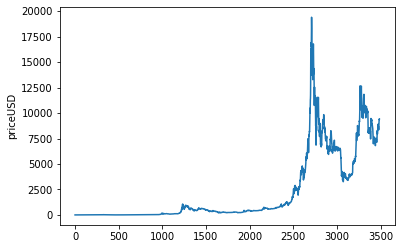

In [4]:
plt.plot(data['priceUSD'])
plt.ylabel('priceUSD')
plt.show()

Check if data has has any missing values

In [5]:
data.isnull().any().sum()

0

Stationary or Non-Stationary:

To check if the data is stationary or Non-stationary , we will split the data into 4 parts of equal intervals based on time and plot box plots.

In [6]:
data=data.sort_values('Date')
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


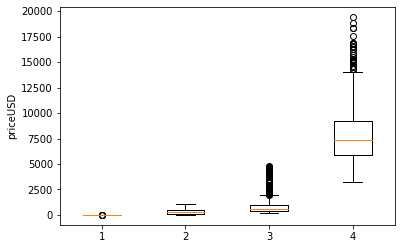

In [7]:
p1=data[:int(len(data)/4)]['priceUSD']
p2=data[int(len(data)/4):int(2*len(data)/4)]['priceUSD']
p3=data[int(2*len(data)/4):int(3*len(data)/4)]['priceUSD']
p4=data[int(3*len(data)/4):int(4*len(data)/4)]['priceUSD']
plt.boxplot([p1,p2,p3,p4])
plt.ylabel('priceUSD')
plt.show()

Removing features with lower impact.

Reference:
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Adjusting Data According to the Model

For End of day

In [13]:
# No Need of Adjustment

Method 1

Using RFE with Pearson correlation:

RFE splits the data and runs many models with different subsets of input features and select those features that result in the best performing model according to a performance metric.

In [8]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

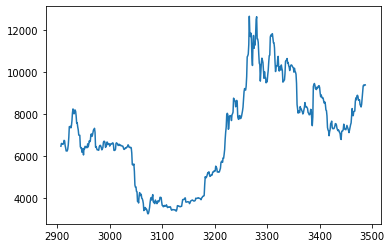

In [9]:
plt.plot(x_test['priceUSD'])

In [10]:
estimator= SVR(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(x_train.drop(['Date','priceUSD'],axis=1),x_train['priceUSD'])
Features = selector.support_

In [11]:
y_test = x_test['priceUSD']
x_test = x_test.drop(['Date','priceUSD'],axis=1)[x_test.drop(['Date','priceUSD'],axis=1).columns[Features]]

In [12]:
x_train.shape

(2907, 737)

In [13]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','priceUSD'],axis=1)[x_train.drop(['Date','priceUSD'],axis=1).columns[Features]], x_train['priceUSD'], test_size=0.16, random_state=42)

In [14]:
sp      = SelectPercentile(f_regression).fit(x_train, y_train)
x_train = sp.transform(x_train)
x_cv = sp.transform(x_cv)
x_test = sp.transform(x_test)

In [15]:
x_train.shape

(2441, 37)

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 37)]              0         
_________________________________________________________________
dense (Dense)                (None, 37)                1406      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                760       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4     

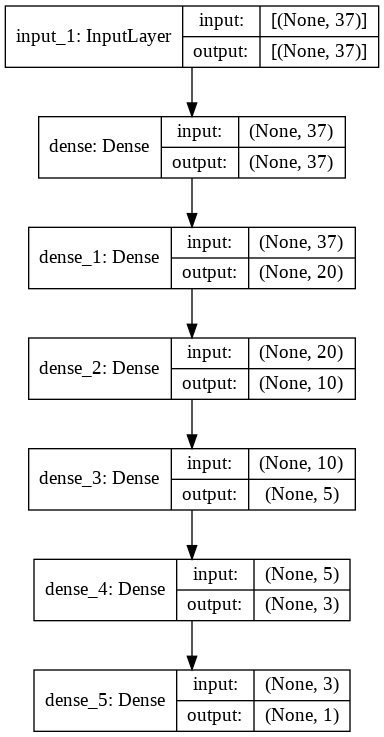

In [17]:
input_path1= Input(shape=(37))
# lstm_output, lstm_state_h, lstm_state_c =LSTM(1,return_sequences=True,return_state=True)(input_path1)
# Flatten1=Flatten()(lstm_output)
Dense1=Dense(37,activation='relu',kernel_initializer='he_uniform')(input_path1)
Dense2=Dense(20,activation='relu',kernel_initializer='he_uniform')(Dense1)
Dense3=Dense(10,activation='relu',kernel_initializer='he_uniform')(Dense2)
Dense4=Dense(5,activation='relu',kernel_initializer='he_uniform')(Dense3)
Dense5=Dense(3,activation='relu',kernel_initializer='he_uniform')(Dense4)
Dense6=Dense(1,activation='relu',kernel_initializer='he_uniform')(Dense5)
model= Model(inputs=input_path1,outputs=Dense6)
model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [18]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='logcosh',optimizer=opt,metrics=['mean_squared_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [19]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Scaler=make_pipeline(RobustScaler(),MinMaxScaler()).fit(x_train,y_train)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=500,callbacks=tensorboard_callback)

Epoch 1/500
2441/2441 [==============================] - 5s 2ms/step - loss: 688.0383 - mean_squared_error: 4077000.7673 - val_loss: 145.6220 - val_mean_squared_error: 151638.6719
Epoch 2/500
2441/2441 [==============================] - 3s 1ms/step - loss: 156.0424 - mean_squared_error: 187445.9090 - val_loss: 124.6867 - val_mean_squared_error: 127349.9688
Epoch 3/500
2441/2441 [==============================] - 3s 1ms/step - loss: 123.8365 - mean_squared_error: 118654.8247 - val_loss: 113.9060 - val_mean_squared_error: 116403.0312
Epoch 4/500
2441/2441 [==============================] - 3s 1ms/step - loss: 96.5925 - mean_squared_error: 76396.2598 - val_loss: 96.8357 - val_mean_squared_error: 99440.8594
Epoch 5/500
2441/2441 [==============================] - 3s 1ms/step - loss: 93.1142 - mean_squared_error: 89710.3825 - val_loss: 83.7081 - val_mean_squared_error: 79515.0469
Epoch 6/500
2441/2441 [==============================] - 3s 1ms/step - loss: 79.9812 - mean_squared_error: 70777

Text(0, 0.5, 'priceUSD')

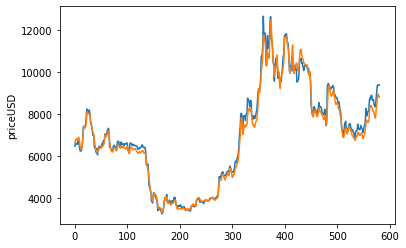

In [20]:
y_test_pred=model.predict(x_test).flatten()

sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [21]:
print(mean_squared_error(y_test, y_test_pred))

72074.00688998014


In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=100000, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=100000, epsilon=0.1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=100))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=1000,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=1000,learning_rate=0.1,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=1000,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

Method 2

Using PCA:

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [ ]:
data.head()

In [ ]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

In [ ]:
y_test = x_test['priceUSD']
x_test = x_test.drop(['Date','priceUSD'],axis=1)

In [ ]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','priceUSD'],axis=1), x_train['priceUSD'], test_size=0.16, random_state=42)

In [ ]:
pca = PCA(n_components=40)
pca = pca.fit(x_train,y_train)
x_train_pca=pd.DataFrame(pca.transform(x_train))
x_cv_pca=pd.DataFrame(pca.transform(x_cv))
x_test_pca=pd.DataFrame(pca.transform(x_test))

In [ ]:
x_train_pca.head()

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=5000, epsilon=i))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=5000, epsilon=0.1))
regr.fit(x_train_pca,y_train)
y_test_pred=regr.predict(x_test_pca)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
# PCA is no good

For 7 day interval

In [22]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [23]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [24]:
data['After_7']=0
for i in range(len(data['Date'])):
 data['After_7'].iloc[i]  = re.sub('-','/',str(datetime.strptime(data['Date'].iloc[i],'%Y/%m/%d') + relativedelta(days=+7))[:10])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [25]:
data.head(2)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,After_7
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.0010,539.000,1396.0,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.5,1331.0,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/07/24
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.0163,386.333,1407.0,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.0,1044.0,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/07/25


In [26]:
after_7=data[['Date','priceUSD']]
after_7['After_7']=after_7['Date']
after_7['priceUSD_7']=after_7['priceUSD']
after_7=after_7.drop(['Date','priceUSD'],axis=1)
data=data.merge(after_7,on='After_7')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,After_7,priceUSD_7
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/07/24,0.0581
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/07/25,0.0530
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/07/26,0.0530
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0,2010/07/27,0.0580
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0,2010/07/28,0.0595


In [28]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

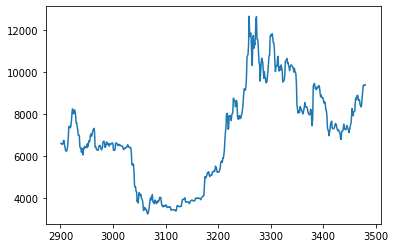

In [29]:
plt.plot(x_test['priceUSD_7'])

In [30]:
estimator= SVR(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(x_train.drop(['Date','After_7'],axis=1),x_train['priceUSD_7'])
Features = selector.support_

In [31]:
y_test = x_test['priceUSD_7']
x_test = x_test.drop(['Date','After_7'],axis=1)[x_test.drop(['Date','After_7'],axis=1).columns[Features]]

In [32]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','After_7'],axis=1)[x_train.drop(['Date','After_7'],axis=1).columns[Features]], x_train['priceUSD_7'], test_size=0.16, random_state=42)

In [33]:
sp      = SelectPercentile(f_regression).fit(x_train, y_train)
x_train = sp.transform(x_train)
x_cv = sp.transform(x_cv)
x_test = sp.transform(x_test)

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=1000, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=1000, epsilon=0.1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=100))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=0.1,depth=5,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

In [ ]:
input_path1= Input(shape=(37))
# lstm_output, lstm_state_h, lstm_state_c =LSTM(1,return_sequences=True,return_state=True)(input_path1)
# Flatten1=Flatten()(lstm_output)
Dense1=Dense(37,activation='relu',kernel_initializer='he_uniform')(input_path1)
Dense2=Dense(20,activation='relu',kernel_initializer='he_uniform')(Dense1)
Dense3=Dense(10,activation='relu',kernel_initializer='he_uniform')(Dense2)
Dense4=Dense(5,activation='relu',kernel_initializer='he_uniform')(Dense3)
Dense5=Dense(3,activation='relu',kernel_initializer='he_uniform')(Dense4)
Dense6=Dense(1,activation='relu',kernel_initializer='he_uniform')(Dense5)
model= Model(inputs=input_path1,outputs=Dense6)
model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='logcosh',optimizer=opt,metrics=['mean_squared_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Scaler=make_pipeline(RobustScaler(),MinMaxScaler()).fit(x_train,y_train)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=500,callbacks=tensorboard_callback)

For 1 Month

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [ ]:
data.head()

In [ ]:
data['After_month']=0
for i in range(len(data['Date'])):
 data['After_month'].iloc[i]  = re.sub('-','/',str(datetime.strptime(data['Date'].iloc[i],'%Y/%m/%d') + relativedelta(months=+1))[:10])

In [ ]:
data.head(2)

In [ ]:
after_month=data[['Date','priceUSD']]
after_month['After_month']=after_month['Date']
after_month['priceUSD_month']=after_month['priceUSD']
after_month=after_month.drop(['Date','priceUSD'],axis=1)
data=data.merge(after_month,on='After_month')

In [ ]:
data.head()

In [ ]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

In [ ]:
plt.plot(x_test['priceUSD_month'])

In [ ]:
estimator= SVR(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(x_train.drop(['Date','After_month'],axis=1),x_train['priceUSD_month'])
Features = selector.support_

In [ ]:
y_test = x_test['priceUSD_month']
x_test = x_test.drop(['Date','After_month'],axis=1)[x_test.drop(['Date','After_month'],axis=1).columns[Features]]

In [ ]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','After_month'],axis=1)[x_train.drop(['Date','After_month'],axis=1).columns[Features]], x_train['priceUSD_month'], test_size=0.16, random_state=42)

In [ ]:
sp      = SelectPercentile(f_regression).fit(x_train, y_train)
x_train = sp.transform(x_train)
x_cv = sp.transform(x_cv)
x_test = sp.transform(x_test)

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=1000, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=1000, epsilon=0.4))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=100))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=0.5,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=0.1,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

For 3 Month

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [ ]:
data.head()

In [ ]:
data['After_3month']=0
for i in range(len(data['Date'])):
 data['After_3month'].iloc[i]  = re.sub('-','/',str(datetime.strptime(data['Date'].iloc[i],'%Y/%m/%d') + relativedelta(months=+1))[:10])

In [ ]:
data.head(2)

In [ ]:
after_3month=data[['Date','priceUSD']]
after_3month['After_3month']=after_3month['Date']
after_3month['priceUSD_3month']=after_3month['priceUSD']
after_3month=after_3month.drop(['Date','priceUSD'],axis=1)
data=data.merge(after_3month,on='After_3month')

In [ ]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

In [ ]:
plt.plot(x_test['priceUSD_3month'])

In [ ]:
estimator= SVR(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(x_train.drop(['Date','After_3month'],axis=1),x_train['priceUSD_3month'])
Features = selector.support_

In [ ]:
y_test = x_test['priceUSD_3month']
x_test = x_test.drop(['Date','After_3month'],axis=1)[x_test.drop(['Date','After_3month'],axis=1).columns[Features]]

In [ ]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','After_3month'],axis=1)[x_train.drop(['Date','After_3month'],axis=1).columns[Features]], x_train['priceUSD_3month'], test_size=0.16, random_state=42)

In [ ]:
sp      = SelectPercentile(f_regression).fit(x_train, y_train)
x_train = sp.transform(x_train)
x_cv = sp.transform(x_cv)
x_test = sp.transform(x_test)

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=800, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=800, epsilon=0.1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=100))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=50,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=50,learning_rate=0.3,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train)
plt.plot(cv)
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test) 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred)
plt.ylabel('priceUSD')

In [ ]:
print(mean_squared_error(y_test, y_test_pred))